In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,precision_score,recall_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier



In [88]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [89]:
df.shape

(270, 14)

In [90]:
df.head(30)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [92]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [93]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [94]:
df["Number of vessels fluro"].value_counts()

Number of vessels fluro
0    160
1     58
2     33
3     19
Name: count, dtype: int64

In [95]:
df["Slope of ST"].value_counts()

Slope of ST
1    130
2    122
3     18
Name: count, dtype: int64

In [96]:
df["Thallium"].value_counts()

Thallium
3    152
7    104
6     14
Name: count, dtype: int64

In [97]:
df["FBS over 120"].value_counts()

FBS over 120
0    230
1     40
Name: count, dtype: int64

In [98]:
df["Slope of ST"].value_counts()

Slope of ST
1    130
2    122
3     18
Name: count, dtype: int64

In [99]:
prediciton = {
    "Presence": 1,
    "Absence": 0 
}
df["Heart Disease"] = df["Heart Disease"].map(prediciton)


In [100]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [101]:
scaler = StandardScaler()
ohe = OneHotEncoder()
le = LabelEncoder()

In [102]:
num_cols = ["Age","BP","Cholesterol","Max HR","Thallium","ST depression"]

In [103]:
print(df.columns)

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [104]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [105]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,1.181012,2,3,-0.875706,1
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,0.481153,2,0,1.189277,0
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,1,0,1.189277,1
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,2,1,1.189277,0
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,1,-0.875706,0


In [106]:
binary_cols = [
    'Sex',
    'FBS over 120',
    'Exercise angina',
    'Heart Disease'
]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [107]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,1.181012,2,3,-0.875706,1
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,0.481153,2,0,1.189277,0
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,1,0,1.189277,1
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,2,1,1.189277,0
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,1,-0.875706,0


In [108]:
df = pd.get_dummies(
    df,
    columns=[
        'Chest pain type',
        'EKG results',
        'Slope of ST',
        'Number of vessels fluro'
    ],
    drop_first=True
)


In [109]:
df.head()

,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Thallium,Heart Disease,Chest pain type_2,Chest pain type_3,Chest pain type_4,EKG results_1,EKG results_2,Slope of ST_2,Slope of ST_3,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3
0,1.712094,1,-0.075410,1.402212,0,-1.759208,0,1.181012,-0.875706,1,False,False,True,False,True,True,False,False,False,True
1,1.382140,0,-0.916759,6.093004,0,0.446409,0,0.481153,1.189277,0,False,True,False,False,True,True,False,False,False,False
2,0.282294,1,-0.411950,0.219823,0,-0.375291,0,-0.656118,1.189277,1,True,False,False,False,False,False,False,False,False,False
3,1.052186,1,-0.187590,0.258589,0,-1.932198,1,-0.743600,1.189277,0,False,False,True,False,False,True,False,True,False,False
4,2.152032,0,-0.636310,0.374890,0,-1.240239,1,-0.743600,-0.875706,0,True,False,False,False,True,False,False,True,False,False


In [110]:
df.shape

(270, 20)

In [111]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR',
       'Exercise angina', 'ST depression', 'Thallium', 'Heart Disease',
       'Chest pain type_2', 'Chest pain type_3', 'Chest pain type_4',
       'EKG results_1', 'EKG results_2', 'Slope of ST_2', 'Slope of ST_3',
       'Number of vessels fluro_1', 'Number of vessels fluro_2',
       'Number of vessels fluro_3'],
      dtype='object')

In [112]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'FBS over 120', 'Max HR',
       'Exercise angina', 'ST depression', 'Thallium', 
       'Chest pain type_2', 'Chest pain type_3', 'Chest pain type_4',
       'EKG results_1', 'EKG results_2', 'Slope of ST_2', 'Slope of ST_3',
       'Number of vessels fluro_1', 'Number of vessels fluro_2',
       'Number of vessels fluro_3']]

y = df['Heart Disease']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
log_model = LogisticRegression()

In [115]:
lg_model = log_model.fit(X_train,y_train)
y_log_pred = lg_model.predict(X_test)
                         

In [116]:
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_log_pred))
print("Classification Report:")
print(classification_report(y_test, y_log_pred))

Logistic Regression Model Evaluation:
Accuracy: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.94      0.76      0.84        21

    accuracy                           0.89        54
   macro avg       0.90      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



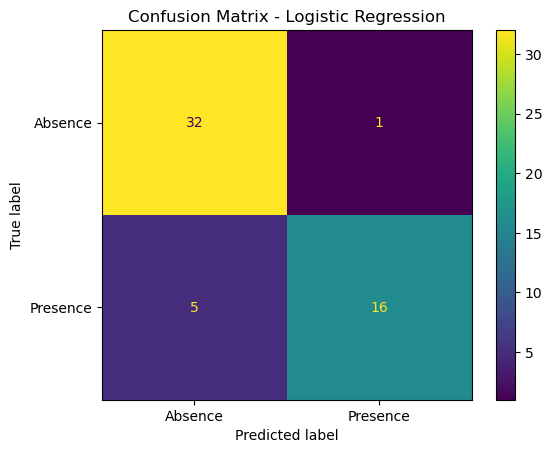

In [117]:
cm = confusion_matrix(y_test, y_log_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Absence", "Presence"]
)

disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [118]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

In [119]:
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Classification Report:")
print(classification_report(y_test, y_rf_pred))

Random Forest Model Evaluation:
Accuracy: 0.7777777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        33
           1       0.80      0.57      0.67        21

    accuracy                           0.78        54
   macro avg       0.78      0.74      0.75        54
weighted avg       0.78      0.78      0.77        54



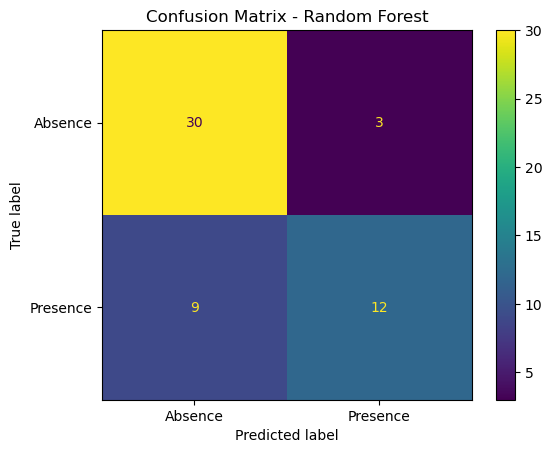

In [120]:
cm = confusion_matrix(y_test, y_rf_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Absence", "Presence"]
)

disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

## Test case #1
### Raw Patient Profile:

```Age: 65 (Older)
Sex: Male (1)
BP: 160 (High)
Cholesterol: 280 (High)
FBS over 120: Yes (1)
Max HR: 120 (Low, indicating poor fitness)
Exercise Angina: Yes (1)
ST Depression: 2.5 (Significant)
Thallium Scan: Reversible Defect (3)
Chest Pain Type: Type 4 (Asymptomatic)
EKG Results: ST-T abnormality (2)
Slope of ST: Flat (2)
Number of Vessels: 3 (Major blockage)

In [121]:
high_risk_test_case = {
    'Age': 1.7,  # Scaled high value
    'Sex': 1.0,
    'BP': 1.5,   # Scaled high value
    'Cholesterol': 2.1,  # Scaled high value
    'FBS over 120': 1.0,
    'Max HR': -1.2, # Scaled low value
    'Exercise angina': 1.0,
    'ST depression': 1.8, # Scaled high value
    'Thallium': -0.8, # Scaled value for '3'
    # One-Hot Encoded Features
    'Chest pain type_2': 0, 'Chest pain type_3': 0, 'Chest pain type_4': 1,
    'EKG results_1': 0, 'EKG results_2': 1,
    'Slope of ST_2': 1, 'Slope of ST_3': 0,
    'Number of vessels fluro_1': 0, 'Number of vessels fluro_2': 0, 'Number of vessels fluro_3': 1
}

# Create a DataFrame from the dictionary
high_risk_df = pd.DataFrame([high_risk_test_case])

# Make sure the columns are in the exact same order as your training data (X)
high_risk_df = high_risk_df[X.columns]

# --- Now you can make a prediction ---
# prediction = model.predict(high_risk_df)
# print("High-Risk Prediction:", prediction)

print("--- High-Risk Test Case (Ready for Model) ---")
print(high_risk_df)

--- High-Risk Test Case (Ready for Model) ---
   Age  Sex   BP  Cholesterol  FBS over 120  Max HR  Exercise angina  \
0  1.7  1.0  1.5          2.1           1.0    -1.2              1.0   

   ST depression  Thallium  Chest pain type_2  Chest pain type_3  \
0            1.8      -0.8                  0                  0   

   Chest pain type_4  EKG results_1  EKG results_2  Slope of ST_2  \
0                  1              0              1              1   

   Slope of ST_3  Number of vessels fluro_1  Number of vessels fluro_2  \
0              0                          0                          0   

   Number of vessels fluro_3  
0                          1  


In [124]:
test_case = log_model.predict(high_risk_df)[0]
print("High-Risk Prediction (Logistic Regression):", test_case)

High-Risk Prediction (Logistic Regression): 1


In [125]:
test_case = rf_model.predict(high_risk_df)[0]
print("High-Risk Prediction (Random Forest):", test_case)

High-Risk Prediction (Random Forest): 1


## Test case #2
### Raw Patient Profile:

``` Age: 35 (Younger)
Sex: Female (0)
BP: 120 (Normal)
Cholesterol: 180 (Normal)
FBS over 120: No (0)
Max HR: 180 (High, indicating good fitness)
Exercise Angina: No (0)
ST Depression: 0.5 (Minimal)
Thallium Scan: Normal (7)
Chest Pain Type: Type 2 (Non-anginal pain)
EKG Results: Normal (0)
Slope of ST: Upsloping (1)
Number of Vessels: 0 (No blockage) ```

In [ ]:
low_risk_test_case = {
    'Age': -1.2, # Scaled low value
    'Sex': 0.0,
    'BP': -0.5,  # Scaled low value
    'Cholesterol': -0.3, # Scaled low value
    'FBS over 120': 0.0,
    'Max HR': 1.9,  # Scaled high value
    'Exercise angina': 0.0,
    'ST depression': -0.9, # Scaled low value
    'Thallium': 1.1, # Scaled value for '7'
    # One-Hot Encoded Features
    'Chest pain type_2': 1, 'Chest pain type_3': 0, 'Chest pain type_4': 0,
    'EKG results_1': 0, 'EKG results_2': 0,
    'Slope of ST_2': 0, 'Slope of ST_3': 0,
    'Number of vessels fluro_1': 0, 'Number of vessels fluro_2': 0, 'Number of vessels fluro_3': 0
}

# Create a DataFrame from the dictionary
low_risk_df = pd.DataFrame([low_risk_test_case])

# Make sure the columns are in the exact same order as your training data (X)
low_risk_df = low_risk_df[X.columns]

print("\n--- Low-Risk Test Case (Ready for Model) ---")
print(low_risk_df)


--- Low-Risk Test Case (Ready for Model) ---
   Age  Sex   BP  Cholesterol  FBS over 120  Max HR  Exercise angina  \
0 -1.2  0.0 -0.5         -0.3           0.0     1.9              0.0   

   ST depression  Thallium  Chest pain type_2  Chest pain type_3  \
0           -0.9       1.1                  1                  0   

   Chest pain type_4  EKG results_1  EKG results_2  Slope of ST_2  \
0                  0              0              0              0   

   Slope of ST_3  Number of vessels fluro_1  Number of vessels fluro_2  \
0              0                          0                          0   

   Number of vessels fluro_3  
0                          0  


In [127]:
test_pred = log_model.predict(low_risk_df)[0]
print("Low-Risk Prediction (Logistic Regression):", test_pred)

Low-Risk Prediction (Logistic Regression): 0


In [128]:
test_case = rf_model.predict(low_risk_df)[0]
print("Low-Risk Prediction (Random Forest):", test_case)

Low-Risk Prediction (Random Forest): 0


In [130]:
import joblib
import pandas as pd

# Assume 'model' is your trained RandomForestClassifier
# and 'scaler' is your fitted StandardScaler

# 1. Save the trained model
joblib.dump(model, 'heart_disease_model.pkl')

# 2. Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')

# 3. Save the full column list from your processed DataFrame (X)
# This is crucial for making sure the test case has the right columns
joblib.dump(list(X.columns), 'model_columns.pkl')

print("Model, scaler, and columns saved successfully!")

NameError: name 'model' is not defined